# Final Project
Albert Xu & Regina Zbarskaya

We are using the wine quality dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. Our goal is to be able to predict whether a wine is red or white based on its properties. The models we use are Logistic Regression, SVM, and Neural Net. We also played with PCA.

## Setup

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition.pca import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm

In [35]:
# import data into dataframes 
df1 = pd.read_csv('winequality-red.csv', delimiter=';')
df2 = pd.read_csv('winequality-white.csv', delimiter=';')

# place values into arrays 
red = df1.values
white = df2.values
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [36]:
# Create column of ones for red and column of zeros for white 
red = np.hstack((df1.values, np.ones((red.shape[0], 1))))
white = np.hstack((df2.values, np.zeros((white.shape[0], 1))))

# Combine both red and white arrays into one final array 
X = np.vstack((red, white))

# Separate y from x by using last column of 1s/0s to indicate red/white 
X, y = X[:,:-1], X[:,-1]

# Split data randomly into (approximately) equal arrays of training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print("Training size: %d examples" % len(y_train))
print("Test size: %d examples" % len(y_test))

Training size: 3248 examples
Test size: 3249 examples


# Logistic Regression


Lasso (L1) Regularization: 
	Training Accuracy: 98.58%
	Test Accuracy: 98.71%

Ridge (L2) Regularization: 
	Training Accuracy: 97.84%
	Test Accuracy: 98.43%


(0.9, 1)

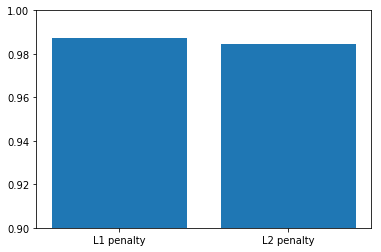

In [43]:
# Apply logistic regression on data to predict red/white wine 
def logreg_acc(penalty, X_train, X_test, y_train, y_test, debug=False):
    logreg = LogisticRegression(penalty=penalty)
    logreg.fit(X_train, y_train)
    tr_acc = logreg.score(X_train, y_train)
    ts_acc = logreg.score(X_test, y_test)
    if debug:
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc*100))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc*100))
    return tr_acc, ts_acc
    
ts_acc = []
# ---------- Lasso (L1) Regularization ----------
print('\nLasso (L1) Regularization: ')
ts_acc.append(logreg_acc('l1', X_train, X_test, y_train, y_test, debug=True)[1])

# ---------- Ridge (L2) Regularization ----------
print('\nRidge (L2) Regularization: ')
ts_acc.append(logreg_acc('l2', X_train, X_test, y_train, y_test, debug=True)[1])

plt.bar(range(2), ts_acc)
plt.xticks(range(2), ['L1 penalty', 'L2 penalty'])
plt.ylim(0.9, 1)


(2) Poly Feature Transformation, Lasso (L1) Regularization: 
	Training Accuracy: 99.14%
	Test Accuracy: 98.89%

(2) Poly Feature Transformation, Ridge (L2) Regularization: 
	Training Accuracy: 98.37%
	Test Accuracy: 98.68%

(3) Poly Feature Transformation, Lasso (L1) Regularization: 
	Training Accuracy: 99.72%
	Test Accuracy: 99.02%

(3) Poly Feature Transformation, Ridge (L2) Regularization: 
	Training Accuracy: 96.83%
	Test Accuracy: 97.08%
[0.9889196675900277, 0.9867651585103109, 0.9901508156355802, 0.9707602339181286]


(0.9, 1)

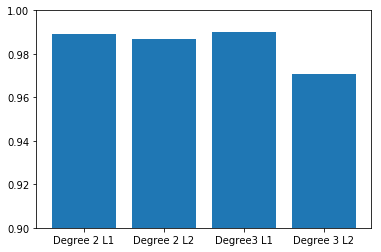

In [51]:
# ---------- Polynomial Feature Transformation (2, 3) ----------
def poly_t(feat, model):
    poly = PolynomialFeatures(feat)
    # Create the transformed data matrices for training and test using poly.fit_transform(..)
    X_transformed_train = poly.fit_transform(X_train)
    X_transformed_test = poly.fit_transform(X_test)
    return logreg_acc(model, X_transformed_train, X_transformed_test, y_train, y_test, debug=True)

ts_acc = []
# Perform logistic regression with both regularizations
for i in range(2,4):
    print('\n({0}) Poly Feature Transformation, Lasso (L1) Regularization: '.format(i))
    ts_acc.append(poly_t(i, 'l1')[1])
    print('\n({0}) Poly Feature Transformation, Ridge (L2) Regularization: '.format(i))
    ts_acc.append(poly_t(i, 'l2')[1])
print(ts_acc)
plt.bar(range(4), ts_acc)
plt.xticks(range(4), ['Degree 2 L1', 'Degree 2 L2', 'Degree3 L1', 'Degree 3 L2'])
plt.ylim(0.9, 1)

### Logistic with PCA

Text(0,0.5,'Test Accuracy')

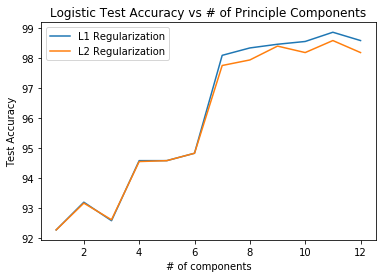

In [56]:
# ---------- Changing Number of Principle Components (Logistic) ----------
def pca_transform(X, n_components):
    pca = PCA(n_components)
    pca.fit(X)
    return pca.transform(X)

# create arrays to hold test accuracy 
test_acc_1 = []
test_acc_2 = []
for i in range(1, 13):
    # split original x array based on n components 
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    # fit using l1 regularization 
    acc = logreg_model('l1', X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_1.append(acc[1])
    # fit using l2 regularization 
    acc = logreg_model('l2', X2_train, X2_test, Y2_train, Y2_test, 1)
    test_acc_2.append(acc[1])

# plot both regularizations on one graph 
l1, = plt.plot(range(1, 13), test_acc_1, label='L1 Regularization')
l2, = plt.plot(range(1,13), test_acc_2, label='L2 Regularization')
plt.legend(handles=[l1, l2])
plt.title('Logistic Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

# Support Vector Machines (SVM)

### LinearSVM


Lasso (L1) Regularization: 
	Training Accuracy: 98.58%
	Test Accuracy: 98.71%

Ridge (L2) Regularization: 
	Training Accuracy: 98.74%
	Test Accuracy: 98.80%


(0.9, 1)

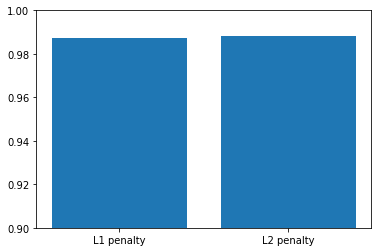

In [58]:
# Apply linear SVM to on data to predict red/white wine 
def svm_linear_acc(penalty, X_train, X_test, y_train, y_test, debug=False):
    model = LinearSVC(penalty=penalty, loss='squared_hinge', dual=False)
    model.fit(X_train, y_train)
    tr_acc = model.score(X_train, y_train)
    ts_acc = model.score(X_test, y_test)
    if debug:
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc*100))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc*100))
    return tr_acc, ts_acc


ts_acc = []
# ---------- Lasso (L1) Regularization ----------
print('\nLasso (L1) Regularization: ')
ts_acc.append(svm_linear_acc('l1', X_train, X_test, y_train, y_test, debug=True)[1])

# ---------- Ridge (L2) Regularization ----------
print('\nRidge (L2) Regularization: ')
ts_acc.append(svm_linear_acc('l2', X_train, X_test, y_train, y_test, debug=True)[1])

plt.bar(range(2), ts_acc)
plt.xticks(range(2), ['L1 penalty', 'L2 penalty'])
plt.ylim(0.9, 1)

### SVM with PCA

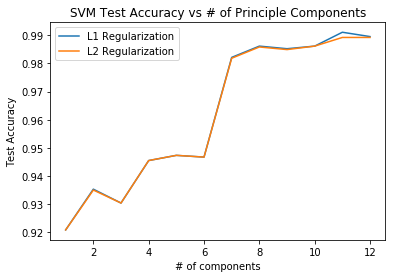

In [62]:
# ---------- Changing Number of Principle Components for LinearSVC ----------
# create arrays to hold test accuracy 
test_acc1 = []
test_acc2 = []
for i in range(1, 13):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.5)
    # fit using l1 regularization 
    test_acc1.append(svm_linear_acc('l1', X2_train, X2_test, Y2_train, Y2_test)[1])
    # fit using l2 regularization 
    test_acc2.append(svm_linear_acc('l2', X2_train, X2_test, Y2_train, Y2_test)[1])

# plot both regularizations on one graph 
l1, = plt.plot(range(1, 13), test_acc1, label='L1 Regularization')
plt.title('SVM Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc2, label='L2 Regularization')
plt.legend(handles=[l1, l2])

### PCA for different SVM kernels

In [74]:
# Apply different SVM kernels to predict red/white wine 
def svm_acc(kernel, X_train, X_test, y_train, y_test, debug=False):
    model = svm.SVC(probability=False,kernel=kernel)
    model.fit(X_train, y_train)
    # Calculate accuracy 
    tr_acc = model.score(X_train, y_train)
    ts_acc = model.score(X_test, y_test)
    if debug:
        print('\tTraining Accuracy: {0:.2f}%'.format(tr_acc*100))
        print('\tTest Accuracy: {0:.2f}%'.format(ts_acc*100))
    return tr_acc, ts_acc

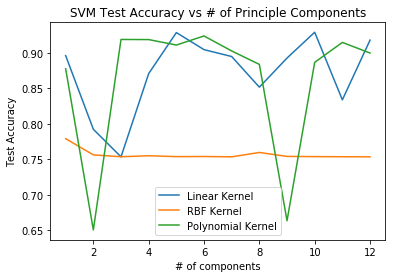

In [84]:
# ---------- Changing Number of Principle Components for SVM ----------
# create arrays to hold test accuracy 
test_acc1 = []
test_acc2 = []
test_acc3 = [] 
for i in range(1, 13):
    #print('Run {0}'.format(i))
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.998)
    #print('\t Linear Kernel')
    # fit using linear kernel
    test_acc1.append(svm_acc('linear', X2_train, X2_test, Y2_train, Y2_test)[1])
    #print('\t RBF Kernel')
    # fit using rbf kernel
    test_acc2.append(svm_acc('rbf', X2_train, X2_test, Y2_train, Y2_test)[1])
    
for i in range(1, 13):
    #print('Run {0}'.format(i))
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(pca_transform(X, i), y, test_size=0.998)
    #print('\t Polynomial Kernel ')
    # fit using polynomial kernel 
    test_acc3.append(svm_acc('poly', X2_train, X2_test, Y2_train, Y2_test)[1])

# plot all three kernels on one graph 
l1, = plt.plot(range(1, 13), test_acc1, label='Linear Kernel')
plt.title('SVM Test Accuracy vs # of Principle Components')
plt.xlabel('# of components')
plt.ylabel('Test Accuracy')

l2, = plt.plot(range(1,13), test_acc2, label='RBF Kernel')
l3, = plt.plot(range(1,13), test_acc3, label='Polynomial Kernel')
plt.legend(handles=[l1, l2, l3])

# Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
 
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.acc.append(logs.get('acc'))


keras.backend.clear_session()
cb = AccHistory()
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=12))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[cb])

In [ ]:
print("Test Loss: \t{}\nTest Accuracy: \t{}".format(*model.test_on_batch(X_test, y_test)))
plt.plot(cb.acc)
plt.title('Accuracy')
plt.xlabel('epoch')
plt.figure()
plt.plot(cb.loss)
plt.title('Loss')
plt.xlabel('batch')